<a href="https://colab.research.google.com/github/Oldman3840/Mini_Project_4th/blob/main/1.%20%EB%AC%B8%EC%9D%98%20%EB%82%B4%EC%9A%A9%20%EC%9C%A0%ED%98%95%20%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [90]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [91]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

plt.rc('font', family='NanumBarunGothic') 

### 1-3. 한글 글꼴 설정(Windows)

In [92]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [93]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [94]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [95]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [96]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 1-4. 구글드라이브 연결(Colab)

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [98]:
path = '/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/train.csv'

data = pd.read_csv(path)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [99]:
data

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [101]:
data.isnull().sum()

text     0
label    0
dtype: int64

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [102]:
max_str = data['text'].max()
min_str = data['text'].min()

max_str_idx = data.loc[data['text'] == max_str].index
min_str_idx = data.loc[data['text'] == min_str].index

print(f'최대 길이 문의 index: {max_str_idx} \n최대 길이 문장 내용: \n{max_str}')
print(f'최소 길이 문의 index: {min_str_idx} \n최소 길이 문장 내용: \n{min_str}')

최대 길이 문의 index: Int64Index([3384], dtype='int64') 
최대 길이 문장 내용: 
히스토그램과 바 그래프의 차이와 각각 어느 데이터의 경우에 대해 활용하면 좋을지 구분하여 알려주시면 감사하겠습니다.
최소 길이 문의 index: Int64Index([230], dtype='int64') 
최소 길이 문장 내용: 




이 코드에서 어떤 부분이 틀린것인지에 대해서 잘 모르겠습니다.

혹시 테스트케이스를 알수있을까요?

# 깊이 우선탐색



n,m = map(int,input().split())

graph = [[] for _ in range(n+1)]

for _ in range(m):
    a,b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)

visited = []
def dfs(start,graph,visited):
    if start in visited:
        return
    visited.append(start)
    
    for node in graph[start]:
        dfs(node,graph,visited)
    return visited

a = dfs(1,graph,visited)
for i in a:
    print(i,end = ' ')
    
    



### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [103]:
from konlpy.tag import *

In [104]:
def Text_Separator(array, operator):
    nouns, pos = [], []
    print(f'class {operator}의 PoS, 명사 추출 시간: ')
    for n in array:
        tmp = []
        tmp = operator.nouns(n)
        nouns.append(tmp)
        tmp = operator.pos(n)
        pos.append(tmp)

    nouns = np.concatenate(nouns).tolist()
    # pos = np.concatenate(pos).tolist()

    return nouns, pos
      

In [105]:
okt = Okt()
mecab = MeCab()
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()

In [106]:
%time okt_noun, okt_PoS = Text_Separator(data['text'].values, okt)
%time mecab_noun, mecab_PoS = Text_Separator(data['text'].values, mecab)
# %time hannanum_noun, hannanum_PoS = Text_Separator(data['text'].values, hannanum)
# %time kkma_noun, kkma_PoS = Text_Separator(data['text'].values, kkma)
# %time komoran_noun, komoran_PoS = Text_Separator(data['text'].values, komoran)

class <konlpy.tag._okt.Okt object at 0x7f1dd0f4a4f0>의 PoS, 명사 추출 시간: 
CPU times: user 44.8 s, sys: 263 ms, total: 45 s
Wall time: 41.6 s
class <mecab.mecab.MeCab object at 0x7f1dd0f4ab80>의 PoS, 명사 추출 시간: 
CPU times: user 5.53 s, sys: 39.8 ms, total: 5.57 s
Wall time: 5.54 s


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [107]:
# * 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
import nltk
from nltk.tokenize import word_tokenize

nt_okt_nouns = nltk.Text(okt_noun)
nt_mecab_nouns = nltk.Text(mecab_noun)

# * 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
print(len(nt_okt_nouns))
print(len(set(nt_okt_nouns)))
print(len(set(nt_okt_nouns)) / len(nt_okt_nouns))
print(len(nt_mecab_nouns))
print(len(set(nt_mecab_nouns)))
print(len(set(nt_mecab_nouns)) / len(nt_mecab_nouns))

print(f'okt frequency distribution: {nt_okt_nouns.vocab()}')
print(f'mecab frequency distribution: {nt_mecab_nouns.vocab()}')

63167
3865
0.06118701220574034
57025
3423
0.060026304252520826
okt frequency distribution: <FreqDist with 3865 samples and 63167 outcomes>
mecab frequency distribution: <FreqDist with 3423 samples and 57025 outcomes>


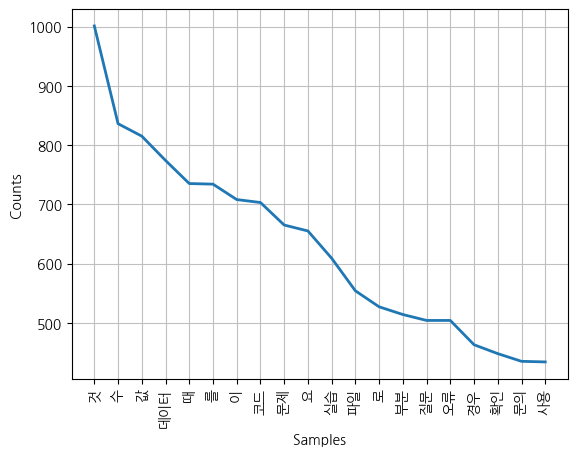

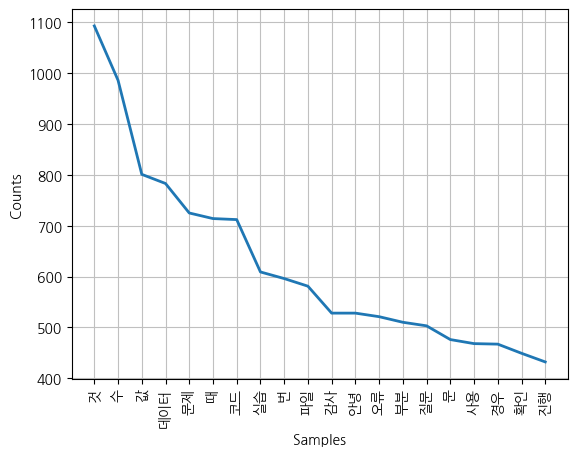

<Axes: xlabel='Samples', ylabel='Counts'>

In [108]:
# * 각각 Frequency 확인 및 분포 시각화
nt_okt_nouns.plot(20)
nt_mecab_nouns.plot(20)

In [109]:
nt_okt_pos = nltk.Text(okt_PoS)
nt_mecab_pos = nltk.Text(mecab_PoS)

In [110]:
from nltk import FreqDist

In [113]:
fd_okt = FreqDist(okt_PoS[0])

In [116]:
fd_okt.most_common(30)

[(('.', 'Punctuation'), 5),
 ((',', 'Punctuation'), 4),
 (('100', 'Number'), 4),
 (('1', 'Number'), 3),
 (('K', 'Alpha'), 3),
 (('nn', 'Alpha'), 2),
 (('(', 'Punctuation'), 2),
 (('으로', 'Josa'), 2),
 (('self', 'Alpha'), 1),
 (('convs', 'Alpha'), 1),
 (('=', 'Punctuation'), 1),
 (('ModuleList', 'Alpha'), 1),
 (('([', 'Punctuation'), 1),
 (('Conv', 'Alpha'), 1),
 (('2', 'Number'), 1),
 (('d', 'Alpha'), 1),
 (('Co', 'Alpha'), 1),
 (('))', 'Punctuation'), 1),
 (('for', 'Alpha'), 1),
 (('in', 'Alpha'), 1),
 (('Ks', 'Alpha'), 1),
 (('])', 'Punctuation'), 1),
 (('\n', 'Foreign'), 1),
 (('여기', 'Noun'), 1),
 (('서', 'Josa'), 1),
 (('커널', 'Noun'), 1),
 (('사이즈', 'Noun'), 1),
 (('은', 'Noun'), 1),
 (('한', 'Verb'), 1),
 (('단어', 'Noun'), 1)]

In [111]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(okt_PoS[0])



In [ ]:
# * 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
print(len(nt_okt_pos))
print(len(set(nt_okt_pos)))
print(len(set(nt_okt_pos)) / len(nt_okt_pos))
print(len(nt_mecab_pos))
print(len(set(nt_mecab_pos)))
print(len(set(nt_mecab_pos)) / len(nt_mecab_pos))

print(f'okt frequency distribution: {nt_okt_pos.vocab()}')
print(f'mecab frequency distribution: {nt_mecab_pos.vocab()}')

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

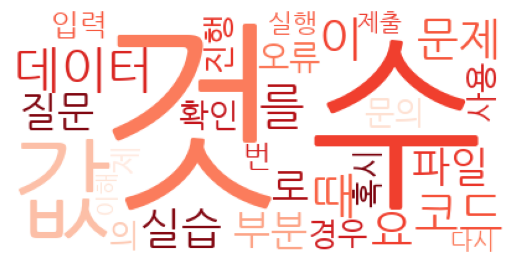

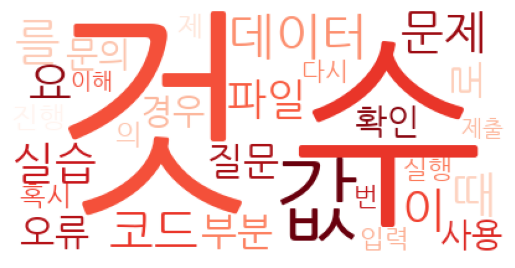

In [33]:
# 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
wc = WordCloud(font_path = FONT_PATH, # 한글 글씨체 설정
               background_color='white', # 배경색은 흰색으로 
               colormap='Reds', # 글씨색은 빨간색으로
               )
# 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
# 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
# .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성

okt_counts = Counter(okt_noun_list)
okt_tags = okt_counts.most_common(30)
okt_cloud = wc.generate_from_frequencies(dict(okt_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(okt_cloud)
plt.axis('off')
plt.show()
print()
mecab_counts = Counter(okt_noun_list)
mecab_tags = mecab_counts.most_common(30)
mecab_cloud = wc.generate_from_frequencies(dict(mecab_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(mecab_cloud)
plt.axis('off')
plt.show()

In [35]:
okt_counts = Counter(okt_PoS)
okt_tags = okt_counts.most_common(30)
okt_cloud = wc.generate_from_frequencies(dict(okt_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(okt_cloud)
plt.axis('off')
plt.show()

TypeError: ignored

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용